<a href="https://colab.research.google.com/github/CHO1116/Pyedu_Inha2021/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 기말 보고서
> 학과: 컴퓨터공학과

> 학번: 12161657

> 이름: 조영준

* 목차
  * 서론 (Introduction)
    * 문제 인식

  * 본론 (Body)
    * 일상 생활속의 다양한 문제에 대해 데이터 분석을 수행하거나, 
    * 문제 해결을 위한 알고리즘 직접 만들어 적용해보기
```
      필수 포함 요소(이미지)
          1.   연구 대상 데이터, 또는 알고리즘을 설명할 수 있는 이미지, 또는 표
          2.   문제 해결이나 분석을 위한 플로우 차트(순서도)
          3.   프로그램 코드
          4.   프로그램 실행 결과 (그래프 출력 필수)
```
  * 결론 (Conclusion)
    * 결론 및 해결방안 모색

  * 참고 문헌 (References)
  * 참여 후기

In [1]:
# 사용할 라이브러리와 데이터 파일을 첫 단계에서 먼저 불러오기
import pandas as pd
import matplotlib.pyplot as plt
df1 = pd.read_csv('/content/drive/MyDrive/Total_Num_2010_2020.csv', encoding = 'CP949')
df2 = pd.read_csv('/content/drive/MyDrive/Death_Num_2010_2019.csv', encoding = 'CP949')
df3 = pd.read_csv('/content/drive/MyDrive/Suicide_Num_2010_2019.csv', encoding = 'CP949')

In [2]:
# 1) df1 가공단계
# 연령과 연도만 남겨둔 초기 가공 자료 (연앙인구) / 다음 자료 가공할 때 이 자료를 통해 시작 
init_df1 = df1.loc[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
                   ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']]
init_df1.columns.names=['Year']
init_df1.index.names=['Ages']
init_df1.index=['Sum', '0 ~ 4', '5 ~ 9', '10 ~ 14', '15 ~ 19', '20 ~ 24', '25 ~ 29', '30 ~ 34', '35 ~ 39', '40 ~ 44', '45 ~ 49',
                '50 ~ 54', '55 ~ 59', '60 ~ 64', '65 ~ 69', '70 ~ 74', '75 ~ 79', '80 ~ 84', '85 ~ 89', '90 ~ 94', '95 ~ 99', 'Over a Hundred']
# 문자열로 인식할 가능성이 있으므로 선제적으로 수 체계 적용
init_df1 = init_df1.apply(pd.to_numeric)
#Step1. 인구추이 그래프에 사용될 dataframe
init_df1_total = init_df1.loc[['Sum']]

init_df1_total

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Sum,49879811.5,50111475.5,50345324.5,50558951.5,50763158.0,50951719.0,51112971.5,51230704.0,51300879.5,51337423.5,51349259.0


In [3]:
# 2) df2 가공단계
# 연간 사망자 수 자료 가공(연령별 미제공 자료)
init_df2 = df2.loc[[1],['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']]
init_df2.columns.names = ['Year']
init_df2.index.names = ['Total Death']
init_df2.index = ['Sum']
# 2020년 사망자 수 잠정치(305100)
init_df2['2020'] = 305100
init_df2 = init_df2.apply(pd.to_numeric)

init_df2

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Sum,255405,257396,267221,266257,267692,275895,280827,285534,298820,295110,305100


Text(0, 0.5, 'Population( * 1e+07)')

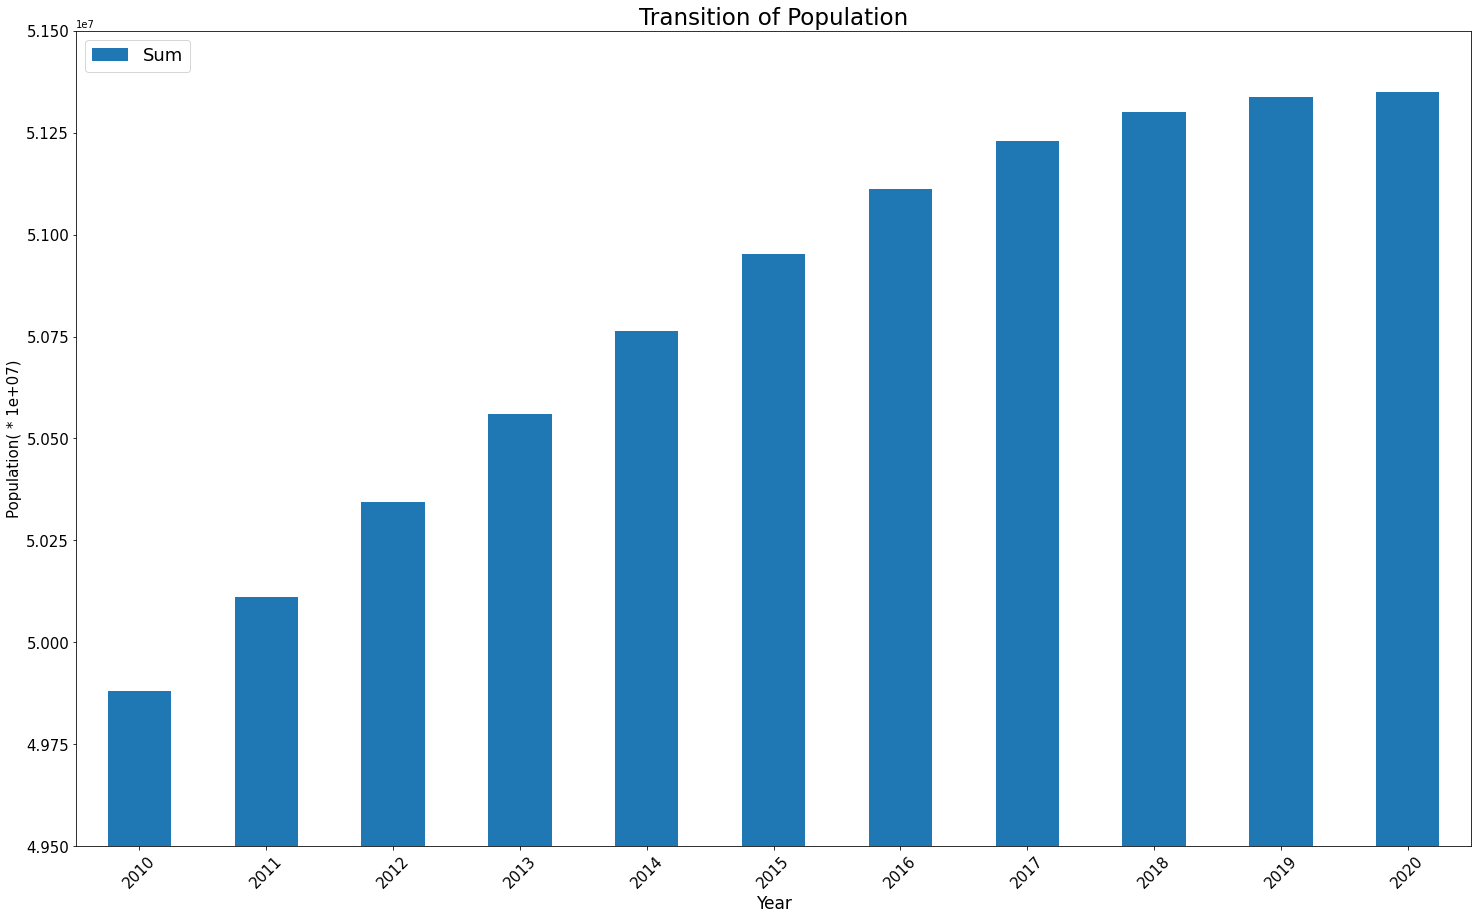

In [4]:
# 3) df1에서 그래프1 도출
# 연앙인구 수 추이(최근 10년) - *그래프1
# 행렬변환 - 그래프가 이쁘게 나오려면 연도가 열로 들어가야함
init_df1_total_trans = init_df1_total.transpose()
# 차트 종류, 제목, 범례 
init_df1_total_trans.plot(kind = 'bar', ylim = [49500000,51500000], figsize = (25, 15), fontsize = 15, legend = True, rot = 45)

plt.legend(loc='upper left', fontsize = 18)
plt.title('Transition of Population', fontsize = 23)
plt.xlabel('Year', fontsize = 17)
plt.ylabel('Population( * 1e+07)', fontsize = 15)

In [5]:
# 4) df1과 df2의 연산을 통해 그래프2 도출
# 사망률 : 연앙인구 수 대비 사망자 수 * 1000
init_df2_trans = init_df2.transpose()
# 1000분비
div = init_df2.div(init_df1_total) * 1000

div

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Sum,5.120408,5.136468,5.307762,5.266268,5.273352,5.414832,5.494241,5.573494,5.824851,5.748438,5.941663


Text(0, 0.5, 'Death / Population * 1,000( %)')

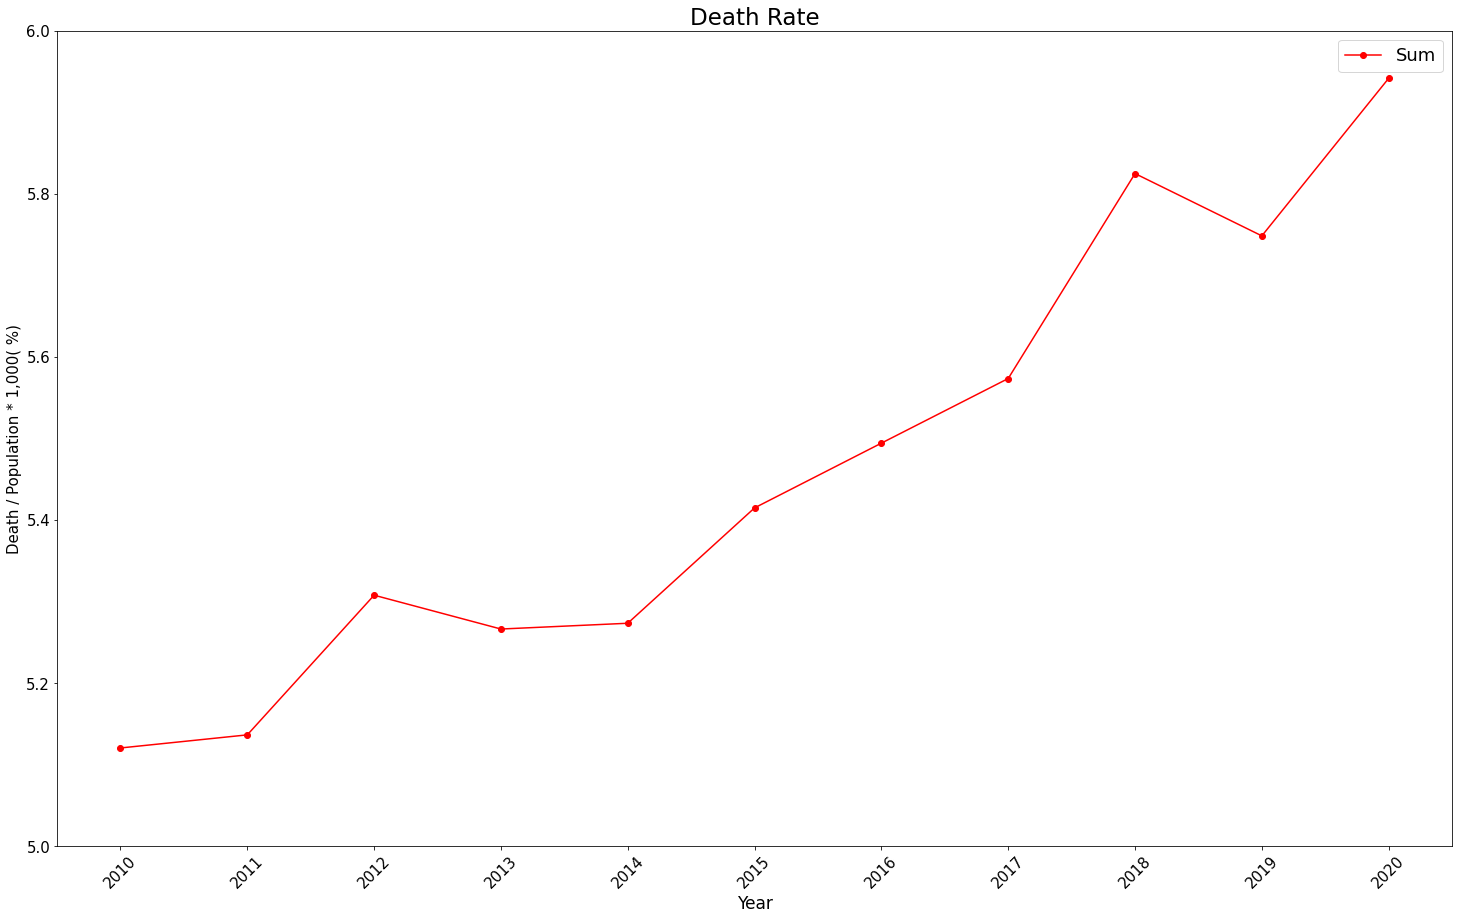

In [6]:
# 사망률 추이 - *그래프2
div_trans = div.transpose()
div_trans.plot(ylim = [5.0, 6.0], figsize = (25, 15), fontsize = 15, legend = True, xticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], rot = 45, color = 'red', marker = 'o')

plt.legend(loc='upper right', fontsize = 18)
plt.title('Death Rate', fontsize = 23)
plt.xlabel('Year', fontsize = 17)
plt.ylabel('Death / Population * 1,000( %)', fontsize = 15)

In [7]:
# 5) df3 가공단계
# 연령별 자살자 수 자료 가공
init_df3 = df3.loc[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
                   ['2010', '2011', '2012', '2013', '2014', '2015', '2016',
                    '2017', '2018', '2019']]
init_df3.columns.names = ['Year']
init_df3.index.names=['Ages']
init_df3.index=['Sum', '0', '1 ~ 4', '5 ~ 9', '10 ~ 14', '15 ~ 19', '20 ~ 24', '25 ~ 29', '30 ~ 34', '35 ~ 39', '40 ~ 44', '45 ~ 49',
                '50 ~ 54', '55 ~ 59', '60 ~ 64', '65 ~ 69', '70 ~ 74', '75 ~ 79', '80 ~ 84', '85 ~ 89', 'Over 90\'s', 'Unknown']
init_df3 = init_df3.apply(pd.to_numeric)
init_df3_total = init_df3.loc[['Sum']]
# 13018(2020년 자살자 수 잠정치)
init_df3_total['2020'] = 13018

In [8]:
# 6) df3와 df1의 연산을 통해 그래프3 도출
# 자살사망률 : 연앙인구 수 대비 자살 사망자 수 * 100000
init_df3_total_trans = init_df3_total.transpose()
# 100000분비
div2 = init_df3_total.div(init_df1_total) * 100000
div2

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Sum,31.207014,31.741233,28.12575,28.535006,27.255988,26.521186,25.61385,24.327208,26.646717,26.879027,25.351875


Text(0, 0.5, 'Suicide / Population * 100,000( %)')

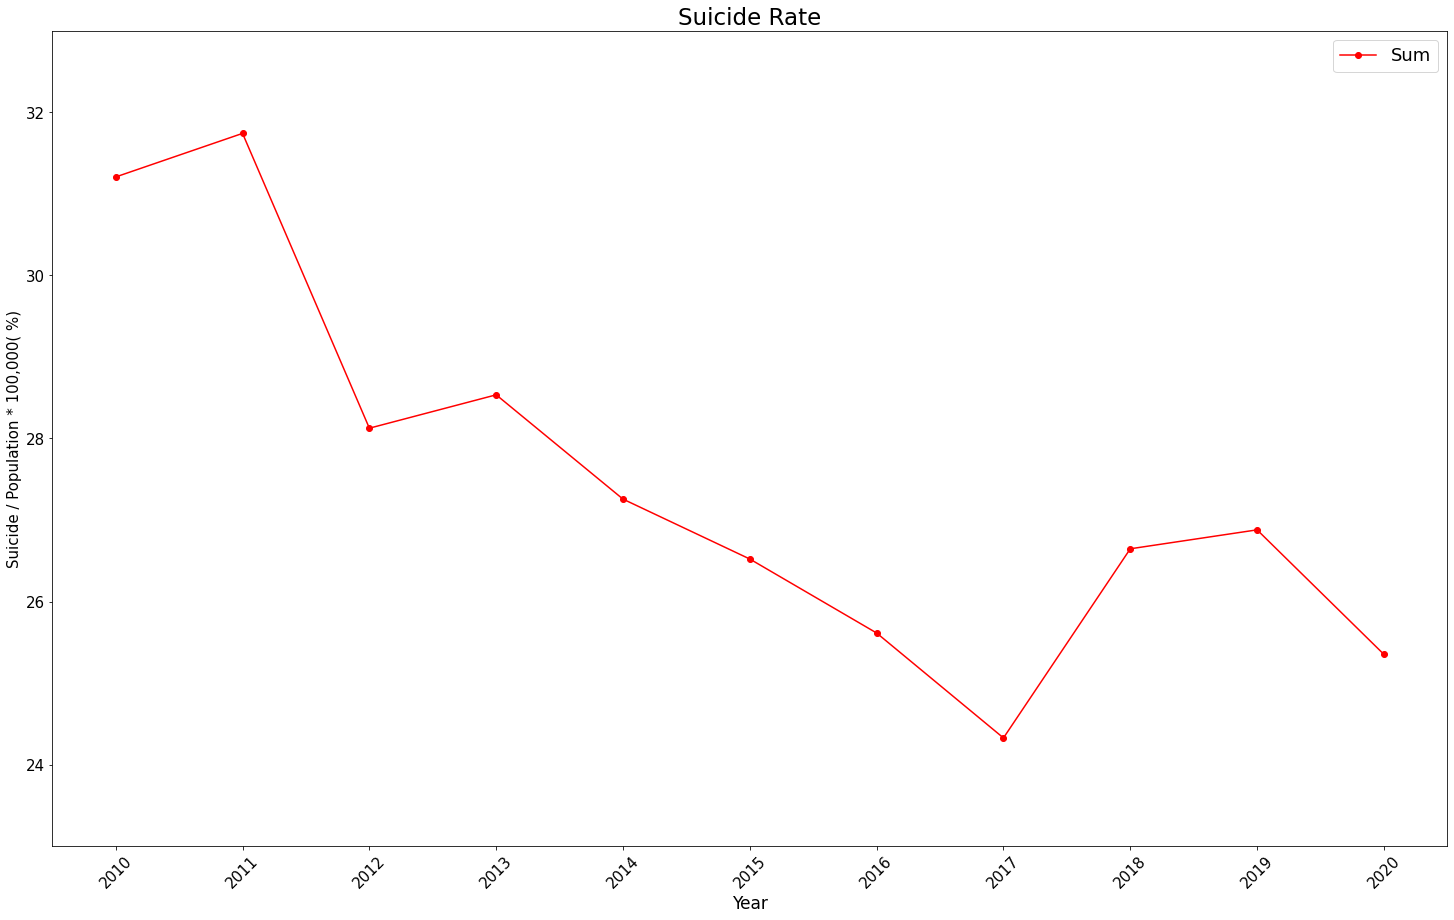

In [9]:
# 자살 사망률 추이 - *그래프3
div2_trans = div2.transpose()
div2_trans.plot(ylim = [23.0, 33.0], figsize = (25, 15), fontsize = 15, legend = True, xticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], rot = 45, color = 'red', marker = 'o')

plt.legend(loc='upper right', fontsize = 18)
plt.title('Suicide Rate', fontsize = 23)
plt.xlabel('Year', fontsize = 17)
plt.ylabel('Suicide / Population * 100,000( %)', fontsize = 15)

In [10]:
# 7) 연령별 그래프를 위한 df3 가공단계 (분할 및 부분합 연산)
# init_df3

init_df3_A = init_df3.iloc[1:4]
init_df3_A.loc['0 ~ 9'] = init_df3_A.sum()
init_df3_A_Group = init_df3_A.loc[['0 ~ 9']]

init_df3_B = init_df3.iloc[4:6]
init_df3_B.loc['10\'s'] = init_df3_B.sum()
init_df3_B_Group = init_df3_B.loc[['10\'s']]

init_df3_C = init_df3.iloc[6:8]
init_df3_C.loc['20\'s'] = init_df3_C.sum()
init_df3_C_Group = init_df3_C.loc[['20\'s']]

init_df3_D = init_df3.iloc[8:10]
init_df3_D.loc['30\'s'] = init_df3_D.sum()
init_df3_D_Group = init_df3_D.loc[['30\'s']]

init_df3_E = init_df3.iloc[10:12]
init_df3_E.loc['40\'s'] = init_df3_E.sum()
init_df3_E_Group = init_df3_E.loc[['40\'s']]

init_df3_F = init_df3.iloc[12:14]
init_df3_F.loc['50\'s'] = init_df3_F.sum()
init_df3_F_Group = init_df3_F.loc[['50\'s']]

init_df3_G = init_df3.iloc[14:16]
init_df3_G.loc['60\'s'] = init_df3_G.sum()
init_df3_G_Group = init_df3_G.loc[['60\'s']]

init_df3_H = init_df3.iloc[16:18]
init_df3_H.loc['70\'s'] = init_df3_H.sum()
init_df3_H_Group = init_df3_H.loc[['70\'s']]

init_df3_I = init_df3.iloc[18:20]
init_df3_I.loc['80\'s'] = init_df3_I.sum()
init_df3_I_Group = init_df3_I.loc[['80\'s']]

init_df3_J_Group = init_df3.iloc[20:21]
init_df3_K_Group = init_df3.iloc[21:22]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [11]:
# 8) 분할한 자료를 merge & transpose
init_df3_new = pd.concat([init_df3_A_Group, init_df3_B_Group, init_df3_C_Group, init_df3_D_Group,
                          init_df3_E_Group, init_df3_F_Group, init_df3_G_Group, init_df3_H_Group, 
                          init_df3_I_Group, init_df3_J_Group, init_df3_K_Group])

init_df3_new_trans = init_df3_new.transpose()

In [12]:
# 최근 10년간 연령대 별 자살 사망자 수의 비율을 나타내는 꺾은선 그래프 20개를 한 화면에 그려보자

Text(0, 0.5, 'Suicide Population')

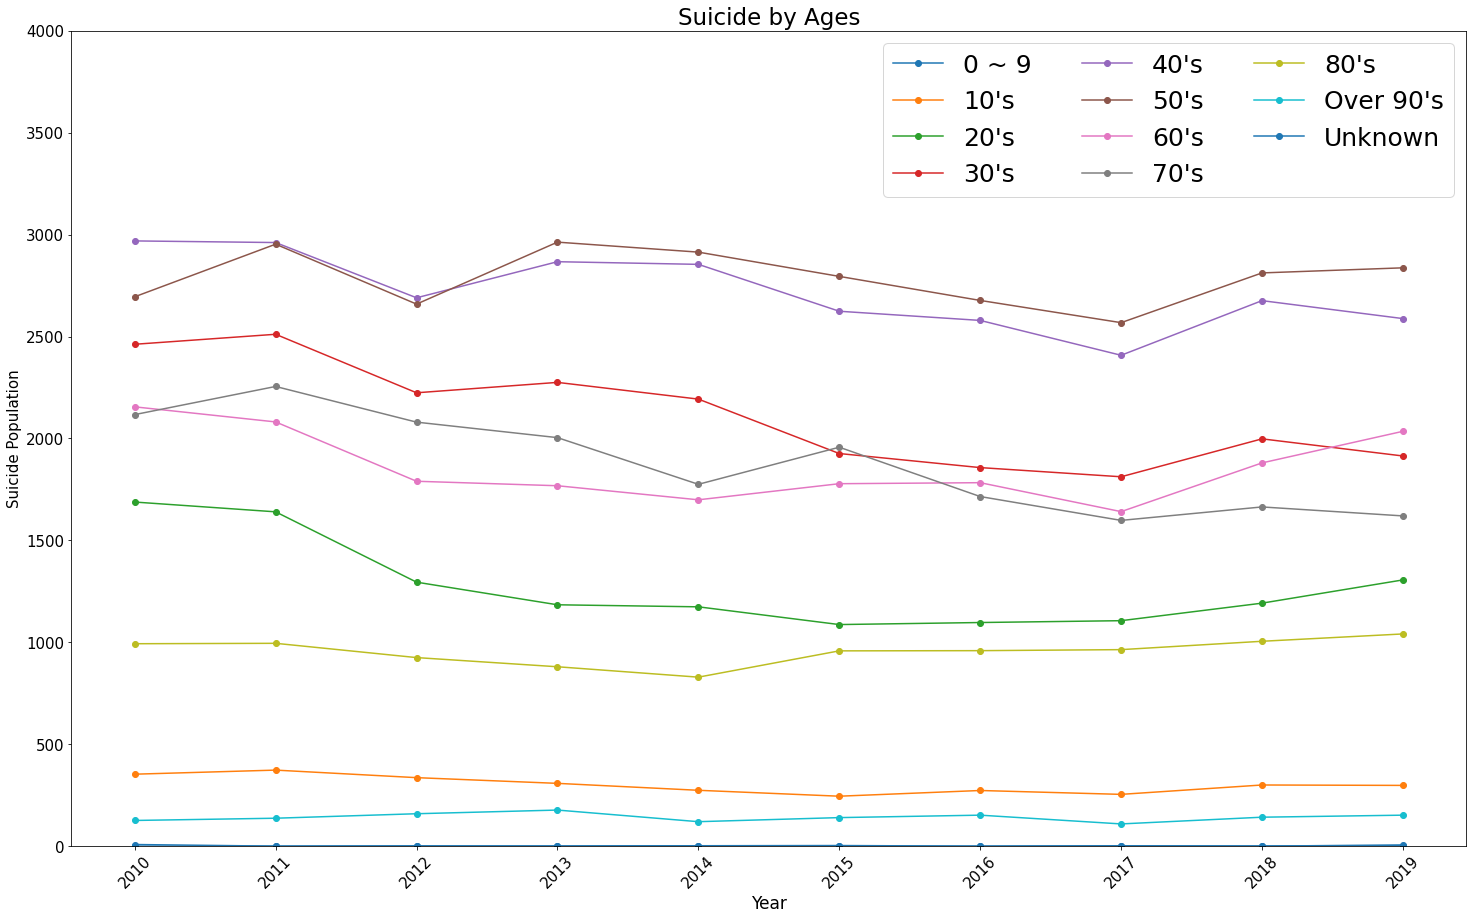

In [13]:
# 9) df3에서 그래프4 도출
# 연령별 자살 사망자 수 추이 - *그래프4
init_df3_new_trans.plot(ylim=[0, 4000], figsize = (25, 15), fontsize = 15, legend = True, xticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], rot = 45, marker = 'o')

plt.legend(loc='upper right', ncol = 3, fontsize = 25)
plt.title('Suicide by Ages', fontsize = 23)
plt.xlabel('Year', fontsize = 17)
plt.ylabel('Suicide Population', fontsize = 15)

In [14]:
# 10) 연령별 그래프를 위한 df1 가공단계 (분할 및 부분합 연산)
# init_df1
init_df1_A = init_df1.iloc[1:3]
init_df1_A.loc['0 ~ 9'] = init_df1_A.sum()
init_df1_A_Group = init_df1_A.loc[['0 ~ 9']]

init_df1_B = init_df1.iloc[3:5]
init_df1_B.loc['10\'s'] = init_df1_B.sum()
init_df1_B_Group = init_df1_B.loc[['10\'s']]

init_df1_C = init_df1.iloc[5:7]
init_df1_C.loc['20\'s'] = init_df1_C.sum()
init_df1_C_Group = init_df1_C.loc[['20\'s']]

init_df1_D = init_df1.iloc[7:9]
init_df1_D.loc['30\'s'] = init_df1_D.sum()
init_df1_D_Group = init_df1_D.loc[['30\'s']]

init_df1_E = init_df1.iloc[9:11]
init_df1_E.loc['40\'s'] = init_df1_E.sum()
init_df1_E_Group = init_df1_E.loc[['40\'s']]

init_df1_F = init_df1.iloc[11:13]
init_df1_F.loc['50\'s'] = init_df1_F.sum()
init_df1_F_Group = init_df1_F.loc[['50\'s']]

init_df1_G = init_df1.iloc[13:15]
init_df1_G.loc['60\'s'] = init_df1_G.sum()
init_df1_G_Group = init_df1_G.loc[['60\'s']]

init_df1_H = init_df1.iloc[15:17]
init_df1_H.loc['70\'s'] = init_df1_H.sum()
init_df1_H_Group = init_df1_H.loc[['70\'s']]

init_df1_I = init_df1.iloc[17:19]
init_df1_I.loc['80\'s'] = init_df1_I.sum()
init_df1_I_Group = init_df1_I.loc[['80\'s']]

init_df1_J = init_df1.iloc[19:]
init_df1_J.loc['Over 90\'s'] = init_df1_J.sum()
init_df1_J_Group = init_df1_J.loc[['Over 90\'s']]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [15]:
# 11) 분할한 자료를 merge & transpose
init_df1_new = pd.concat([init_df1_A_Group, init_df1_B_Group, init_df1_C_Group, init_df1_D_Group,
                          init_df1_E_Group, init_df1_F_Group, init_df1_G_Group, init_df1_H_Group, 
                          init_df1_I_Group, init_df1_J_Group])

init_df1_new_trans = init_df1_new.transpose()

In [16]:
# 12) df3와 df1의 연산을 통해 그래프5 도출
# (연령별) 자살사망률 : (연령별) 연앙인구 수 대비 (연령별) 자살 사망자 수 * 100000
final_df = init_df3_new_trans.div(init_df1_new_trans) * 100000

final_df

,0 ~ 9,10's,20's,30's,40's,50's,60's,70's,80's,Over 90's,Unknown
Year,,,,,,,,,,,
2010,0.000000,5.183548,24.366625,29.574359,34.065204,40.064129,52.654412,83.456791,122.577687,129.651638,NaN
2011,0.000000,5.536979,24.261665,30.524455,33.999137,41.152705,50.138085,84.411435,115.339452,129.149030,NaN
2012,0.021415,5.131119,19.493996,27.344988,30.871925,35.277845,42.439845,73.098208,100.590056,135.185114,NaN
2013,0.000000,4.870527,18.005251,28.370712,32.741194,38.053906,40.705579,66.921485,89.414765,134.508190,NaN
2014,0.043427,4.494882,17.827894,27.946566,32.391759,36.422346,37.505974,57.603313,77.959877,83.704481,NaN
2015,0.000000,4.195144,16.371273,25.084963,29.874830,34.299598,36.852662,62.504601,82.634969,91.644628,NaN
2016,0.000000,4.887031,16.383033,24.632871,29.588491,32.456652,34.612867,54.038929,76.200889,93.152095,NaN
2017,0.022232,4.720902,16.382196,24.524121,27.868780,30.829066,30.175972,48.835414,71.150606,61.576355,NaN
2018,0.022902,5.762346,17.569784,27.526187,31.514006,33.364218,32.855702,48.948072,69.305278,73.202668,NaN


In [17]:
# 1) df1 가공단계
# 2) df2 가공단계
# 3) df1에서 그래프1 도출 인구 수 추이
# 4) df1과 df2의 연산을 통해 그래프2 도출 사망률
# 5) df3 가공단계
# 6) df3와 df1의 연산을 통해 그래프3 도출 자살률
# 7) 연령별 그래프를 위한 df3 가공단계 (분할 및 부분합 연산)
# 8) 분할한 자료를 merge & transpose
# 9) df3에서 그래프4 도출 연령별 사망자 수
# 10) 연령별 그래프를 위한 df1 가공단계 (분할 및 부분합 연산)
# 11) 분할한 자료를 merge & transpose 연령별 사망률
# 12) df3와 df1의 연산을 통해 그래프5 도출
# 가로로 연도별
# init_df1
# init_df1_total
# init_df2
# init_df3
# init_df3_total
# init_df3_new
# 세로로 연도별
# init_df1_total_trans
# init_df2_trans
# init_df3_total_trans
# init_df3_new_trans

Text(0, 0.5, 'Suicide / Population * 100,000( %)')

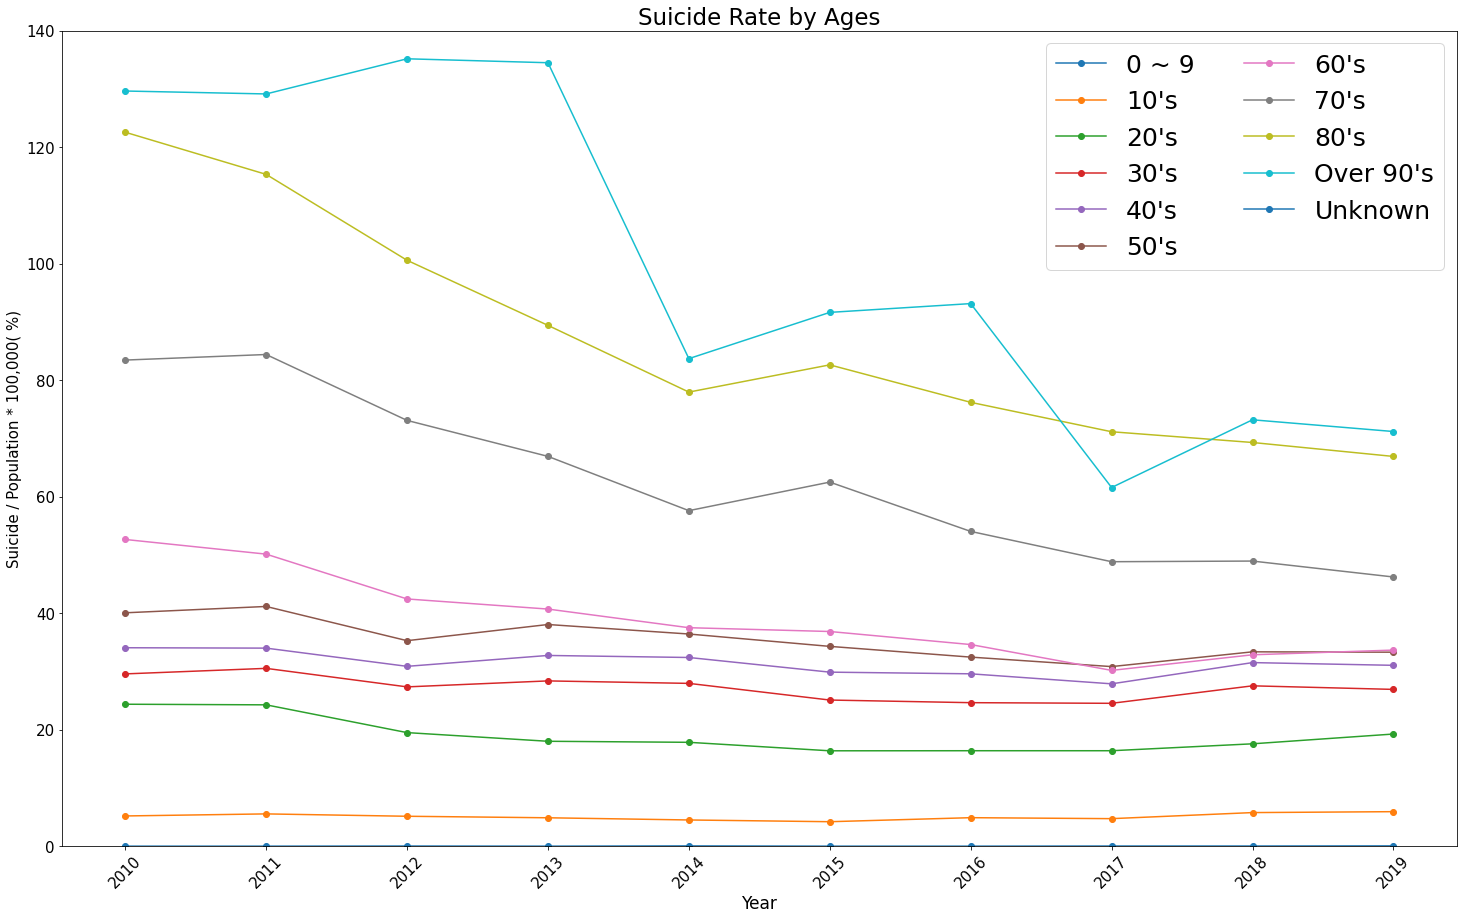

In [18]:
# 최종 가공 데이터
# 연령별 자살률 - 연앙인구 수 대비 연령별 자살 사망자 수 그래프 도출 - *그래프5
final_df.plot(ylim=[0, 140], figsize = (25, 15), fontsize = 15, legend = True, xticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], rot = 45, marker = 'o')

plt.legend(loc='upper right', ncol = 2, fontsize = 25)
plt.title('Suicide Rate by Ages', fontsize = 23)
plt.xlabel('Year', fontsize = 17)
plt.ylabel('Suicide / Population * 100,000( %)', fontsize = 15)